In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler  

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [4]:
wine= pd.read_csv("wine.csv")

In [40]:
wine.data=wine.iloc[:,0:]
wine.data.head()

C:\Users\91705\AppData\Local\Temp/ipykernel_13196/1921397687.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data=wine.iloc[:,0:]


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# A -->> Hierarchical Clustering

In [41]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())   
    return (x)

In [42]:
df_norm = norm_func(wine.iloc[:,1:])
df_norm    # normalization 

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1.000000
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1.000000
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1.000000
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1.000000
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0.666667
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0.666667
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0.666667
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0.666667


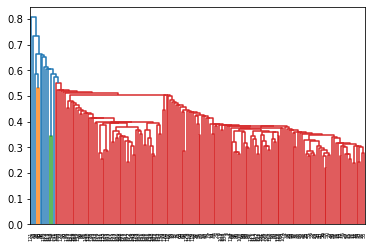

In [7]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

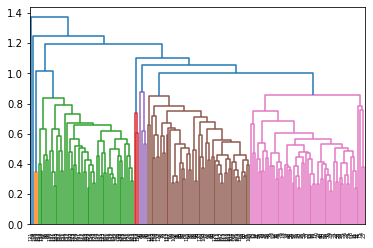

In [8]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))   #most commonly used

In [9]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=5)

In [75]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')
hc

AgglomerativeClustering(linkage='average', n_clusters=5)

In [10]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters']) # type of dataframe
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [11]:
df_norm['h_clusterid'] = Clusters

In [12]:
df_norm.sort_values("h_clusterid")

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
113,0.100000,0.000000,0.609626,0.536082,0.195652,0.517241,0.352321,0.547170,0.324921,0.153584,0.504065,0.380952,0.111270,0
114,0.276316,0.128458,0.609626,0.613402,0.152174,0.544828,0.411392,0.566038,0.198738,0.138225,0.365854,0.703297,0.076320,0
115,0.000000,0.152174,0.449198,0.561856,0.163043,0.510345,0.386076,0.735849,0.504732,0.052901,1.000000,0.586081,0.092011,0
116,0.207895,0.144269,0.336898,0.525773,0.173913,0.344828,0.265823,0.320755,0.353312,0.057167,0.382114,0.754579,0.154779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.378947,0.154150,0.449198,0.432990,1.000000,0.524138,0.407173,0.358491,0.905363,0.112628,0.552846,0.498168,0.470043,1
69,0.310526,0.088933,0.208556,0.319588,0.880435,0.300000,0.198312,0.018868,0.659306,0.133959,0.650407,0.659341,0.313837,1
73,0.515789,0.183794,0.663102,1.000000,0.750000,0.800000,0.537975,0.150943,0.488959,0.176621,0.674797,0.816850,0.504280,2
121,0.139474,0.258893,1.000000,0.922680,0.532609,0.758621,1.000000,0.641509,0.460568,0.402730,0.365854,0.886447,0.133381,3


In [13]:
pd.value_counts("h_clusterid")

h_clusterid    11
dtype: int64

In [14]:
import seaborn as sns

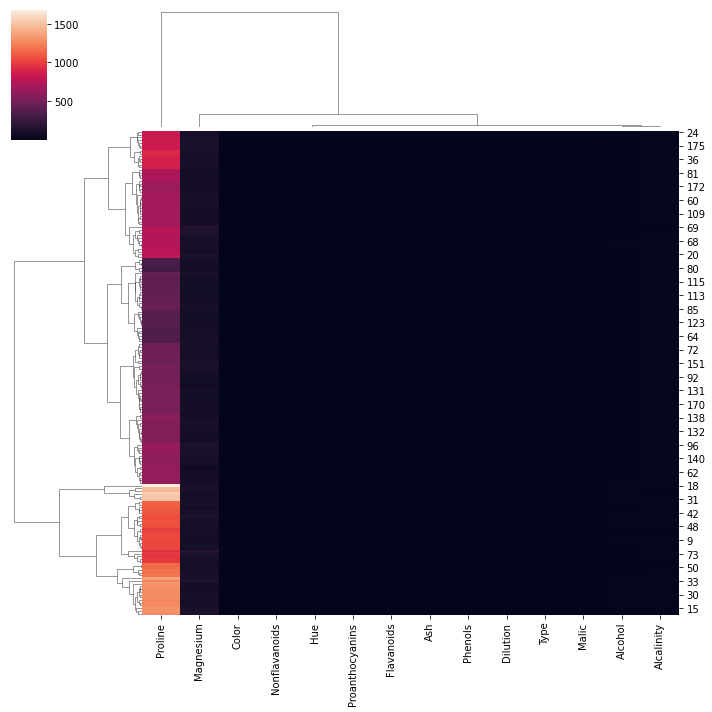

In [15]:
cg=sns.clustermap(wine)
plt.show()

In [176]:
df_norm.to_csv('out1.csv',index=False)    #output the csv file

#### The total data has been clasiified in 5 clusters as per Hierarchical Clustering

# B-->> k mean clustering

In [16]:
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine.iloc[:,1:])
scaled_wine_df 

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
range(1,4)

range(1, 4)

In [19]:
for i in range(1,4):
    print(i)

1
2
3


C:\Users\91705\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


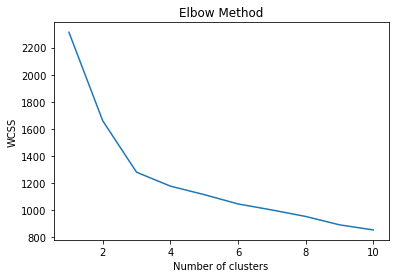

In [20]:
wcss = []   # within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_wine_df)   # scaled means already normalized
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Here as per the elbow curve it is possible that we can take 3 clusters

In [23]:
wcss

[2313.9999999999986,
 1659.0079672511504,
 1278.7607763668154,
 1175.7051928197127,
 1113.0208821682086,
 1044.0780493140435,
 999.5493686263304,
 951.4917384013692,
 889.5309779249253,
 851.8813851482951]

In [24]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_wine_df)

KMeans(n_clusters=4, random_state=42)

In [25]:
clusters_new.labels_

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [26]:
wine['clusterid_new'] = clusters_new.labels_

In [27]:
clusters_new.cluster_centers_

array([[-0.92047428, -0.54205238, -0.65270611,  0.16803997, -0.71111627,
        -0.46194286, -0.25847272,  0.35865056, -0.45114377, -0.92988738,
         0.51334104,  0.06374748, -0.79969176],
       [-0.69968425, -0.03089113,  0.12592974,  0.28824203,  0.30805817,
         0.63532533,  0.59274974, -0.56598859,  0.85807669, -0.69965804,
         0.33104132,  0.65417757, -0.48668217],
       [ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461],
       [ 0.98241605, -0.3617717 ,  0.23340637, -0.8320506 ,  0.44852679,
         0.90869802,  0.99205741, -0.6177819 ,  0.55519849,  0.26237089,
         0.47267321,  0.75353795,  1.2758476 ]])

In [28]:
wine.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.255455,1.732500,2.187955,20.054545,89.613636,2.006818,1.771818,0.406364,1.333409,2.908409,1.074455,2.656818,495.772727
1,1,1.838710,12.434194,2.301935,2.400968,20.454839,104.129032,2.691613,2.619677,0.291613,2.080645,3.440645,1.032903,3.074839,594.064516
2,2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
3,3,1.000000,13.795926,1.933333,2.430370,16.724074,106.129630,2.862222,3.017407,0.285185,1.907778,5.664630,1.065185,3.145185,1147.537037


In [29]:
wine[wine["clusterid_new"]==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,1
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,1
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,1
43,1,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,1
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,1
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,1
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,1


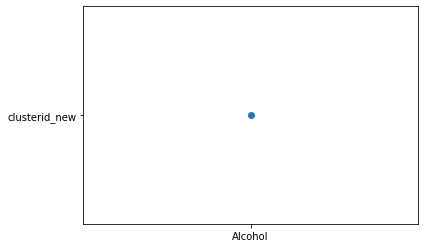

In [30]:
plt.scatter("Alcohol","clusterid_new")

# C -->> PCA 

In [31]:
wine.head(20)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,3
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,3
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,3
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,3
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,3


In [32]:
wine.var()

Type                   0.600679
Alcohol                0.659062
Malic                  1.248015
Ash                    0.075265
Alcalinity            11.152686
Magnesium            203.989335
Phenols                0.391690
Flavanoids             0.997719
Nonflavanoids          0.015489
Proanthocyanins        0.327595
Color                  5.374449
Hue                    0.052245
Dilution               0.504086
Proline            99166.717355
clusterid_new          1.340475
dtype: float64

In [33]:
# wine=wine.drop(["Type"],axis=1)

In [34]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [35]:
wine.head(20)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,3
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,3
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,3
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,3
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,3


In [36]:
wine_normal = scale(wine)

In [37]:
wine_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  1.84791957,
         1.01300893,  1.18244325],
       [-1.21394365,  0.24628963, -0.49941338, ...,  1.1134493 ,
         0.96524152,  1.18244325],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.78858745,
         1.39514818,  1.18244325],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.48544548,
         0.28057537,  0.31629141],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.40069891,
         0.29649784,  0.31629141],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.42894777,
        -0.59516041,  0.31629141]])

In [44]:
pca = PCA(n_components = 6)  
pca_values = pca.fit_transform(wine_normal)

In [45]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)  #values fitted # calculated the zscore and pc (multiplied)

In [46]:
pca_values

array([[ 3.77915248e+00, -1.25471856e+00, -3.97275892e-02, ...,
        -5.46373767e-01, -6.32445055e-02,  1.93421245e-01],
       [ 2.69731659e+00,  1.90018324e-02, -2.11507859e+00, ...,
        -4.53032963e-01,  1.45856211e-01,  9.85469302e-02],
       [ 3.02156735e+00, -9.72486640e-01,  1.02400888e+00, ...,
         7.83550541e-02,  1.13752592e-02, -6.20643520e-02],
       ...,
       [-2.69556715e+00, -3.05002851e+00, -7.02904335e-01, ...,
         2.45440130e-01, -1.32121830e-01, -1.15881421e-03],
       [-2.46975797e+00, -2.56935781e+00, -3.52255042e-01, ...,
        -8.11633900e-02, -1.49485162e-01,  1.15510838e-01],
       [-3.16592281e+00, -3.05412493e+00,  1.20258540e+00, ...,
         9.22703819e-02, -2.87341189e-01, -2.43252698e-01]])

In [47]:
var = pca.explained_variance_ratio_   # ratio of the data 37%
var

array([0.37960602, 0.20976028, 0.09752678, 0.06186119, 0.05892752,
       0.04552346, 0.03697039, 0.02334214, 0.0208212 , 0.01756613,
       0.01505665, 0.01146896, 0.01006404, 0.00767703, 0.00382821])

In [48]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)   # cumulative variance
var1

array([ 37.96,  58.94,  68.69,  74.88,  80.77,  85.32,  89.02,  91.35,
        93.43,  95.19,  96.7 ,  97.85,  98.86,  99.63, 100.01])

In [69]:
 for i in var1:
    print(var1>98)

[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False False
  True  True  True]
[False False False False False False False False False False False Fal

In [49]:
pca.components_  

array([[-3.85779994e-01,  1.71349543e-01, -1.99817831e-01,
         2.19600439e-02, -2.26369569e-01,  1.40271730e-01,
         3.55158616e-01,  3.80920765e-01, -2.61252711e-01,
         2.73378068e-01, -4.85125954e-02,  2.49374166e-01,
         3.30501232e-01,  2.93877532e-01,  1.90056693e-01],
       [-6.17581749e-02, -4.14573035e-01, -2.37196131e-01,
        -2.51958080e-01,  9.86442871e-03, -2.22507824e-01,
         5.62792168e-03,  7.00919932e-02, -5.48367959e-02,
         2.28018690e-02, -4.77072184e-01,  2.91674124e-01,
         2.00925527e-01, -2.93285221e-01, -4.55447798e-01],
       [-1.91460006e-03, -1.53485380e-01,  1.00359220e-01,
         6.49363497e-01,  6.02721179e-01,  1.74114188e-01,
         1.58835966e-01,  1.56124339e-01,  1.65996517e-01,
         1.63063032e-01, -7.69304662e-02,  6.02176980e-02,
         1.50220990e-01, -8.60834449e-02, -8.85202534e-02],
       [ 1.22458320e-01, -8.19202936e-02,  4.69896714e-01,
        -2.49836603e-01,  7.19967600e-02, -1.63246564

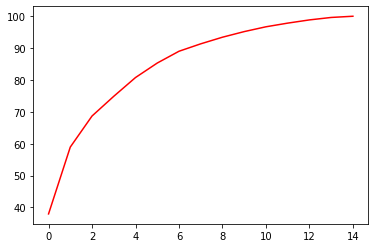

In [50]:
plt.plot(var1,color="red")      ## top 3 componenets -> 98.86,  99.63, 100.01

In [51]:
 pca_values[:,0:1]

array([[ 3.77915248],
       [ 2.69731659],
       [ 3.02156735],
       [ 4.27211028],
       [ 1.32067702],
       [ 3.6074441 ],
       [ 3.01891054],
       [ 2.68899571],
       [ 3.0457861 ],
       [ 3.2347492 ],
       [ 3.92867107],
       [ 2.3497872 ],
       [ 2.6750844 ],
       [ 3.91714507],
       [ 4.74052777],
       [ 2.90237207],
       [ 2.81303515],
       [ 2.51628032],
       [ 4.08072114],
       [ 2.65216171],
       [ 3.54726804],
       [ 1.36171162],
       [ 2.99368336],
       [ 2.15628582],
       [ 1.93944834],
       [ 1.30047033],
       [ 2.37213197],
       [ 1.83014799],
       [ 2.72147188],
       [ 2.75659987],
       [ 3.01999141],
       [ 3.21140424],
       [ 2.17987286],
       [ 2.53180701],
       [ 2.02444554],
       [ 2.41606758],
       [ 2.00323394],
       [ 1.72865206],
       [ 2.01465242],
       [ 3.10120394],
       [ 3.05970109],
       [ 1.33405424],
       [ 3.55598277],
       [ 0.811365  ],
       [ 2.56932991],
       [ 1

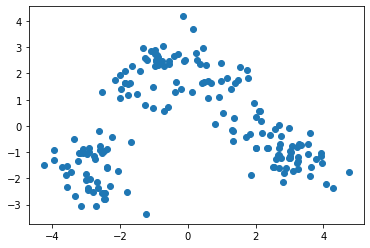

In [70]:
# plot between PCA1 and PCA2 # taking this data as the variance is more in PC1

x = pca_values[:,0:1]   #first columns PC1
y = pca_values[:,1:2]   
#z = pca_values[:2:3]
plt.scatter(x,y)

In [53]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)
finalDf

,pc1,pc2,Type
0,3.779152,-1.254719,1
1,2.697317,0.019002,1
2,3.021567,-0.972487,1
3,4.272110,-2.363773,1
4,1.320677,-0.188528,1
...,...,...,...
173,-3.318586,-2.686452,3
174,-2.692381,-2.123210,3
175,-2.695567,-3.050029,3
176,-2.469758,-2.569358,3


In [54]:
import seaborn as sns

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

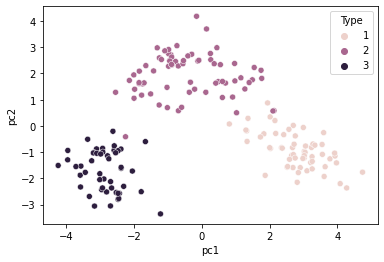

In [55]:
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

#### Interpretation:
    1. There are no outliers in the above scatter chart
    2. The data above is suitable for the data reduction
    3. From the cumulative values the top 3 components have ration-->>> 98.86,  99.63, 100.01 and hence top 3 features are --->Hue, Dilution, Proline
    

In [141]:
# TRial to confirm the answer LDA

In [136]:
# x=wine.drop(["Malic"],axis=1)
# y=wine["Malic"]

In [3]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# lda= LinearDiscriminantAnalysis(n_components=2)
# x_r2= lda.fit(x,y).transform(x)

In [1]:
# print("lda.explained_variance_ratio_",lda.explained_variance_ratio_)